# Modelo analítico

Se desea saber si es posible inferir el **tipo de pase (passholder_type)** tomando en cuenta las demás variables de viaje.

In [1]:
#pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

Creamos el data frame de entrenamiento:

In [3]:
df_train= pd.read_csv("ds-programming-test/train_set.csv")

/tmp/ipykernel_2195/2365136975.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train= pd.read_csv("ds-programming-test/train_set.csv")


In [4]:
df_train.head(5)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


Vemos si hay valores de tipo NAN en alguna de las columnas del data frame:

In [5]:
df_train.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               5563
start_lon               5563
end_lat                18574
end_lon                18574
bike_id                    0
plan_duration            208
trip_route_category        0
passholder_type         2576
start_station              0
end_station                0
dtype: int64

Seis de las variables anteriores presentan valores NAN. Como se demostró en el análisis exploratorio, hay algunas variables que pueden ser determinantes al momento de predecir el tipo de pase que las personas eligen para usar el servicio de bicicletas. Siendo evidente en este análisis el hecho de que por ejemplo, la variable start_time, **dependiendo** del día de la semana se podía observar un uso predominante de algún tipo de pase en un día en particular.

## Variable predictora (Start time):

Convertimos start_time a timestamp:

In [6]:
df_train.start_time = df_train.start_time.astype("datetime64[ns]")

In [7]:
type(df_train.start_time[0])

pandas._libs.tslibs.timestamps.Timestamp

Convertimos de timestamp (fecha) a día de la semana(1, 6, 0, 4, 5, 3, 2). Lunes es 0, martes es 1 y así sucesivamente:

In [8]:
df_train["start_time_class"]=df_train["start_time"].dt.dayofweek

In [9]:
df_train.start_time_class.unique()

array([1, 6, 0, 4, 5, 3, 2])

Convertir a dummies las variables de los días de la semana:

In [10]:
df_dummies_week_days=pd.get_dummies(df_train["start_time_class"])

In [11]:
df_dummies_week_days.head(2)

,0,1,2,3,4,5,6
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1


## Variables predictora(End_time) :

In [12]:
df_train.end_time = df_train.end_time.astype("datetime64[ns]")

In [13]:
df_train["end_time"]=df_train["end_time"].dt.dayofweek

In [14]:
df_train.end_time.unique()

array([1, 6, 0, 4, 5, 3, 2])

In [15]:
df_dummies_week_days_end=pd.get_dummies(df_train["end_time"])

## Creacion del data frame con variables predictoras (Start time + Start station + End_time+ end station)

Se crea un data frame con el nombre **df_train_new** que contiene a la variable **Start time** convertida a 7 variables dummy,que corresponden a los días de la semana.

In [16]:
df_train_new =pd.DataFrame().assign(Lunes=df_dummies_week_days[0]
,Martes=df_dummies_week_days[1],Miercoles=df_dummies_week_days[2]
,Jueves=df_dummies_week_days[3],Viernes=df_dummies_week_days[4]
,Sabado=df_dummies_week_days[5],Domingo=df_dummies_week_days[6]
,Lunes_end=df_dummies_week_days_end[0],Martes_end=df_dummies_week_days_end[1]
,Miercoles_end=df_dummies_week_days_end[2],Jueves_end=df_dummies_week_days_end[3]
,Viernes_end=df_dummies_week_days_end[4],Sabado_end=df_dummies_week_days_end[5]
,Domingo_end=df_dummies_week_days_end[6],start_station=df_train["start_station"]
,end_station=df_train["end_station"],duration=df_train["duration"],passholder_type=df_train["passholder_type"])

In [17]:
df_train_new.head(5)

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes_end,Martes_end,Miercoles_end,Jueves_end,Viernes_end,Sabado_end,Domingo_end,start_station,end_station,duration,passholder_type
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4127,4127,35,Walk-up
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3057,3062,32,Walk-up
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3022,3062,6,Monthly Pass
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4304,4311,138,One Day Pass
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4266,4443,14,Monthly Pass


Contar valores diferentes para **passholder_type**. Esto es útil para saber si existe alguna diferencia considerable respecto a la cantidad de datos que se tengan sobre alguna variable categórica de las que se quieren predecir, repecto a aquellas que tengan más cantidad de datos. Esto podría traer problemas a la calidad del modelo debido a la disparidad de la cantidad datos predictivos entre una vriable categórica y otra .

In [18]:
df_train_new["passholder_type"].value_counts()

Monthly Pass    394769
Walk-up         212426
One Day Pass     44455
Annual Pass      34092
Flex Pass        11604
Testing             78
Name: passholder_type, dtype: int64

De lo anterior vemos que por ejemplo la variable **Testing** posee sólo 78 datos en total respecto al mayor que es de 394769 para la variable categórica **Monthly Pass**. Esta disparidad podría provocar una pobre y poca confiable predicción para **Testing** y que podría afectar de alguna manera a la predicción de las demás categorías.

Observamos que la cantidad de **testing** es muy inferior respecto a los demás por lo que puede causar problemas de underfitting, asíque sería mejor eliminar esos datos que precieran outlayers porque se salen de la tendencia.

In [19]:
df_train_new_wo_testing=df_train_new.drop(df_train_new[df_train_new["passholder_type"]=="Testing"].index)

In [20]:
df_train_new_wo_testing.shape

(699922, 18)

+ Con la siguiente línea se quita además de **testing** a **Flex Pass**, esto también con la finalidad de estabiliziar las predicciones del modelo pues existe una gran diferencia también entre Flex Pass y las categorías con más datos como lo son Monthly Pass y Walk-up.

In [21]:
df_train_new_wo_testing_flexpass=df_train_new_wo_testing.drop(df_train_new_wo_testing[df_train_new_wo_testing["passholder_type"]=="Flex Pass"].index)

In [22]:
df_train_new_wo_testing_flexpass.shape

(688318, 18)

+ Con la siguiente línea se quita además de **testing** a **Flex Pass** y **Annual Pass**.

In [23]:
df_train_new_wo_annualpass=df_train_new_wo_testing_flexpass.drop(df_train_new_wo_testing_flexpass[df_train_new_wo_testing_flexpass["passholder_type"]=="Annual Pass"].index)

In [24]:
df_train_new_wo_annualpass.shape

(654226, 18)

+ Con la siguiente línea se quita además de **testing** a **Flex Pass** **Annual Pass** y **One Day Pass**.

In [25]:
df_train_new_wo_onedaypass=df_train_new_wo_annualpass.drop(df_train_new_wo_annualpass[df_train_new_wo_annualpass["passholder_type"]=="One Day Pass"].index)

In [26]:
df_train_new_wo_onedaypass.shape

(609771, 18)

+ Se asignan varibles numéricas a las categóricas de **passholder_type**

In [27]:
df_train_new_wo_onedaypass.passholder_type =df_train_new_wo_onedaypass.passholder_type.replace({"Walk-up":1,"Monthly Pass":2,"One Day Pass":3,"Annual Pass":4,"Flex Pass":5,"Testing":6})

In [28]:
df_train_new_wo_onedaypass.isnull().sum()

Lunes                 0
Martes                0
Miercoles             0
Jueves                0
Viernes               0
Sabado                0
Domingo               0
Lunes_end             0
Martes_end            0
Miercoles_end         0
Jueves_end            0
Viernes_end           0
Sabado_end            0
Domingo_end           0
start_station         0
end_station           0
duration              0
passholder_type    2576
dtype: int64

Ahora se procede a eliminar valores **NAN** en **passholder_type** ya que únicamente hay 2576 ; comparado con el resto de datos es una ínfima minoría por lo que no debería tener impacto eliminarlos, así que como primer aproximación del desarrollo del modelo se eliminarán :

In [29]:
df_train_new_not_nan = df_train_new_wo_onedaypass[df_train_new_wo_onedaypass['passholder_type'].notna()]

In [30]:
df_train_new_not_nan.isnull().sum()

Lunes              0
Martes             0
Miercoles          0
Jueves             0
Viernes            0
Sabado             0
Domingo            0
Lunes_end          0
Martes_end         0
Miercoles_end      0
Jueves_end         0
Viernes_end        0
Sabado_end         0
Domingo_end        0
start_station      0
end_station        0
duration           0
passholder_type    0
dtype: int64

Se comprueba que efectivamente ya no hay presencia de valores NAN.


In [31]:
df_train_new_not_nan.head()

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes_end,Martes_end,Miercoles_end,Jueves_end,Viernes_end,Sabado_end,Domingo_end,start_station,end_station,duration,passholder_type
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4127,4127,35,1.0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3057,3062,32,1.0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3022,3062,6,2.0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4266,4443,14,2.0
5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4158,4158,30,1.0


Procedemos ahora a construir las variables pedictoras y de respuesta para el entranemiento del modelo.

In [32]:
# X --> variable predictora ; Y--> variable de respuesta

In [33]:
X = df_train_new_not_nan.loc[:,df_train_new_not_nan.columns != "passholder_type"]

In [34]:
Y = df_train_new_not_nan.loc[:,df_train_new_not_nan.columns == "passholder_type"]

In [35]:
Y.passholder_type.unique() # esta línea sólo es para corroborr que se han eliminado los otros tipos de categorías que se considern como outlayers.

array([1., 2.])

Segmetación de los datos de entrenamiento con train_test_split : 80 por ciento datos de entrenamiento y 20 por ciento datos de prueba:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [37]:
X_train,X_test,y_train,y_test = train_test_split(
X,Y,test_size=0.30,random_state=1)

In [38]:
model = linear_model.LogisticRegression(multi_class="multinomial",solver="newton-cg")

Ajuste del modelo de regresión logística:

In [39]:
result=model.fit(X_train,y_train.values.ravel())

/usr/local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


### Evaluación del rendimiento del modelo para los datos de entrenamiento:

Se utiliza el criterio del accuracy y de la matriz de confusión para poder evaluar el rendimiento del modelo.

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix#,precision_score,recall_score,confusion_matrix

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
y_pred_train =model.predict(X_train)

**Accuracy**: La precisión se puede definir como la relación entre el número de casos correctamente clasificados y el total de casos en evaluación. El mejor valor de precisión es 1 y el peor valor es 0.

In [43]:
print("Accuracy",accuracy_score(y_train,y_pred_train))

Accuracy 0.7166522365164363


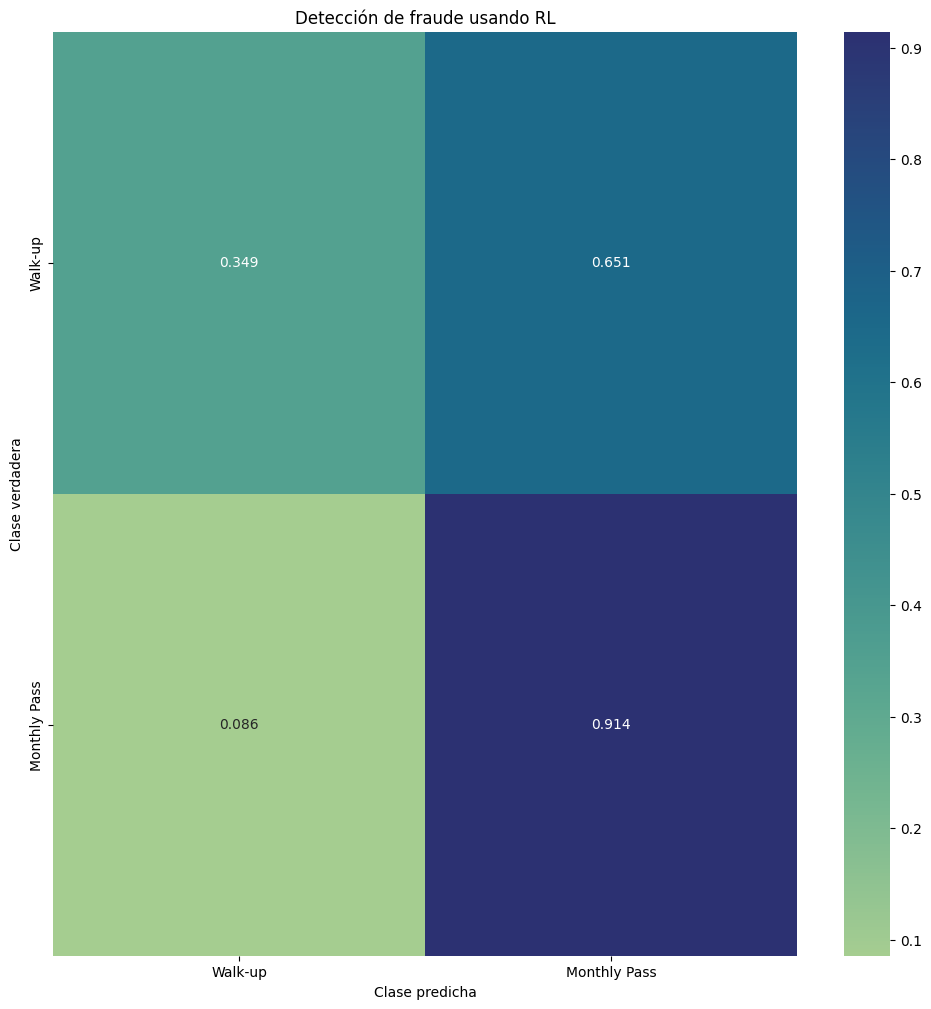

<Figure size 640x480 with 0 Axes>

In [44]:
LABELS = ['Walk-up','Monthly Pass']

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
cmn_train = conf_matrix_train.astype("float")/conf_matrix_train.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(12, 12))
sns.heatmap(cmn_train, xticklabels=LABELS,fmt=".3f" ,yticklabels=LABELS, annot=True,cmap="crest");
plt.title("Detección de fraude usando RL")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()
plt.savefig('heatmappp',dpi=300)



### Evaluación del rendimiento del modelo para los datos de prueba:

In [45]:
#from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [46]:
y_pred =model.predict(X_test)

**Accuracy**: La precisión se puede definir como la relación entre el número de casos correctamente clasificados y el total de casos en evaluación. El mejor valor de precisión es 1 y el peor valor es 0.

In [47]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7166486421203454


Para que el **accuracy** mejorara, se podrían usar los datos de la latitud y la longitud del inicio de viajes, sin embargo debido a que se encuentran en unas unidades tales que no existe mucha diferencia entre uno y otro valor para la mayoría de los datos , pues por ejemplo si calculamos el valor mínimo y el máximo para **start_lat**:

In [48]:
df_train.end_lon.min()

-118.495422

In [49]:
df_train.end_lon.max()

37.606541

In [50]:
df_train.end_lon.mean()

-118.2591832883982

Y al calcular la media de valores (out put anterior) vemos que es muy cercano al valor mínimo y por lo tanto para la mayoría de los valores end_lon, no habrá diferencia prácticamente entre distintos valores siendo una variable poco relevante para modelos predictivos, pues manteniéndode cual si fuera una constante, no resulta congruente usarlas como variables predictoras.

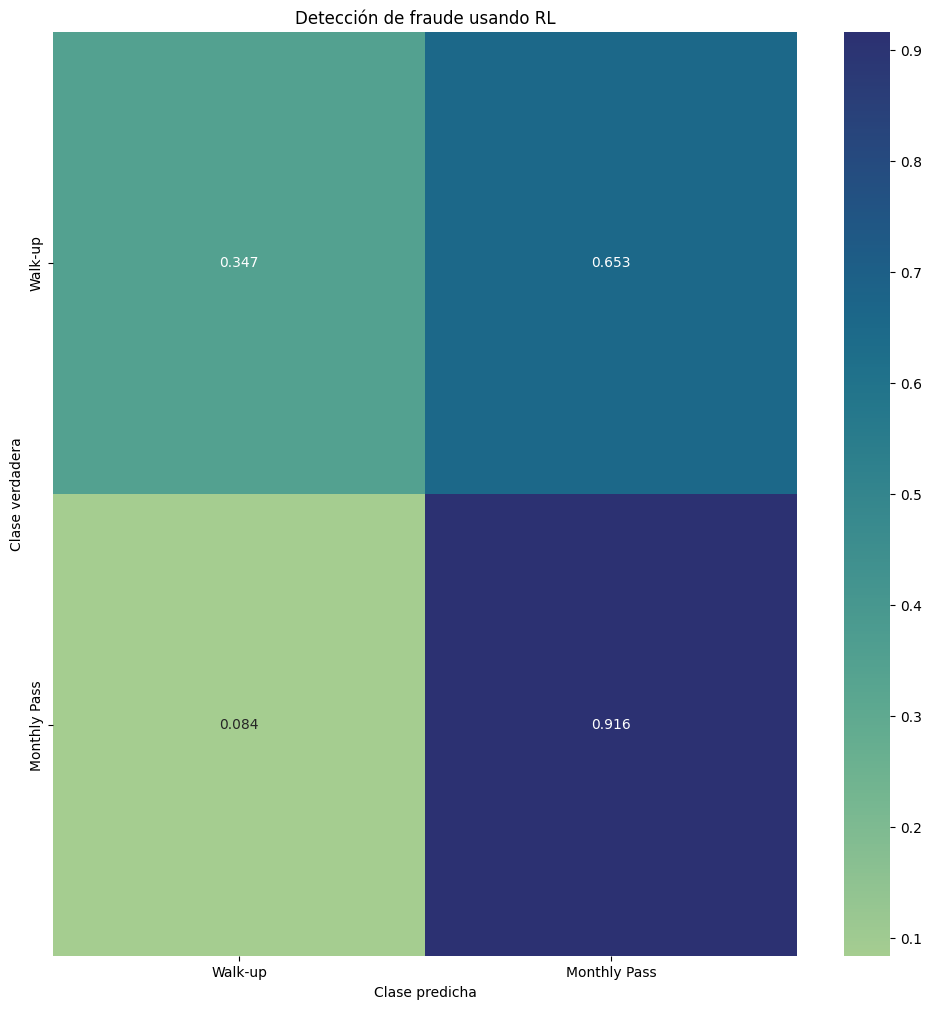

<Figure size 640x480 with 0 Axes>

In [51]:
LABELS = ['Walk-up','Monthly Pass']

conf_matrix_test = confusion_matrix(y_test, y_pred)
cmn_test = conf_matrix_test.astype("float")/conf_matrix_test.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(12, 12))
sns.heatmap(cmn_test, xticklabels=LABELS,fmt=".3f" ,yticklabels=LABELS, annot=True,cmap="crest");
plt.title("Detección de fraude usando RL")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase predicha')
plt.show()
plt.savefig('heatmappp',dpi=300)


# Predicción con el data set de prueba para sample submission

test_set.csv contiene datos que no tienen la variable dependiente y que se debe hacer su
predicción:

In [52]:
df_test_final= pd.read_csv("ds-programming-test/test_set.csv")

/tmp/ipykernel_2195/484746526.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_final= pd.read_csv("ds-programming-test/test_set.csv")


In [53]:
df_test_final.head(2)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
0,17059130,12,1/1/2017 0:24,1/1/2017 0:36,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028
1,17059129,17,1/1/2017 0:28,1/1/2017 0:45,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018


Trasformación a variables dummy de **start_time** y **end_time**

In [54]:
df_test_final.start_time = df_test_final.start_time.astype("datetime64[ns]")

In [55]:
df_test_final["start_time_class"]=df_test_final["start_time"].dt.dayofweek

In [56]:
df_dummies_week_days_final=pd.get_dummies(df_test_final["start_time_class"])

In [57]:
df_test_final.end_time = df_test_final.end_time.astype("datetime64[ns]")

In [58]:
df_test_final["end_time"]=df_test_final["end_time"].dt.dayofweek

In [59]:
df_dummies_week_days_end_final=pd.get_dummies(df_test_final["end_time"])

Ya que se desea predecir la categoría **passholder_type** esta no aparecerá en el siguiente data set:

In [60]:
df_test_new =pd.DataFrame().assign(Lunes=df_dummies_week_days_final[0]
,Martes=df_dummies_week_days_final[1],Miercoles=df_dummies_week_days_final[2]
,Jueves=df_dummies_week_days_final[3],Viernes=df_dummies_week_days_final[4]
,Sabado=df_dummies_week_days_final[5],Domingo=df_dummies_week_days_final[6]
,Lunes_end=df_dummies_week_days_end_final[0],Martes_end=df_dummies_week_days_end_final[1]
,Miercoles_end=df_dummies_week_days_end_final[2],Jueves_end=df_dummies_week_days_end_final[3]
,Viernes_end=df_dummies_week_days_end_final[4],Sabado_end=df_dummies_week_days_end_final[5]
,Domingo_end=df_dummies_week_days_end_final[6],start_station=df_test_final["start_station"]
,end_station=df_test_final["end_station"],duration=df_test_final["duration"])

In [61]:
df_test_new.isnull().sum()

Lunes            0
Martes           0
Miercoles        0
Jueves           0
Viernes          0
Sabado           0
Domingo          0
Lunes_end        0
Martes_end       0
Miercoles_end    0
Jueves_end       0
Viernes_end      0
Sabado_end       0
Domingo_end      0
start_station    0
end_station      0
duration         0
dtype: int64

In [62]:
df_test_new.head(2)

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,Lunes_end,Martes_end,Miercoles_end,Jueves_end,Viernes_end,Sabado_end,Domingo_end,start_station,end_station,duration
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3028,3028,12
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3027,3018,17


In [63]:
y_pred_final =model.predict(df_test_new)

In [64]:
df_pred_final_tripid = pd.DataFrame(data= df_test_final["trip_id"],
                            columns=["trip_id"])

In [65]:
df_pred_final = pd.DataFrame(data= y_pred_final,
                            columns=["passholder_type"])

Se obtiene el data frame que contiene el **trip_id** y la predicción de la variable **passholder_type**.

In [66]:
final_csv=df_pred_final_tripid.join(df_pred_final)

In [67]:
final_csv

,trip_id,passholder_type
0,17059130,2.0
1,17059129,2.0
2,17059126,2.0
3,17059125,2.0
4,17061379,2.0
...,...,...
569881,179408277,2.0
569882,179408276,2.0
569883,179409877,2.0
569884,179409876,2.0


In [68]:
final_csv.to_csv("sample_submission.csv")